<div align='center'><h1>Linkedin Jobs Analysis</h1></div>

Here analysis of jobs posted on social media platform linkedin between March 2023-April 2024 is being carried out

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
job_posting = pd.read_csv('postings.csv')
job_posting.head()

print(job_posting.shape)

(123849, 28)


Adding more information about jobs from other resources

In [3]:
# about company
company = pd.read_csv('companies.csv')
company.drop(columns= ['address','url'], inplace = True, axis=1)
industry = pd.read_csv('company_industries.csv')
company = pd.merge(company, industry, on = 'company_id', how ='left')
speciality = pd.read_csv('company_specialities.csv')
company = pd.merge(company, speciality, on = 'company_id', how = 'left')

In [4]:
# about job
skills  = pd.read_csv('job_skills.csv')
skill_map= pd.read_csv('skills.csv')
job = pd.merge(job_posting, skills, on ='job_id', how ='left')
job = pd.merge(job, skill_map, on='skill_abr', how ='left')
job_benifit = pd.read_csv('benefits.csv')
job_benifit.rename(columns={'type':'benifit'}, inplace=True)
job = pd.merge(job, job_benifit, on='job_id', how='left')

In [5]:
# merging all information in one dataframe
df= pd.merge(job, company, on='company_id', how ='left')
df.drop_duplicates(subset='job_id', inplace=True)

In [6]:
df.columns

Index(['job_id', 'company_name', 'title', 'description_x', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'skill_abr', 'skill_name', 'inferred', 'benifit',
       'name', 'description_y', 'company_size', 'state', 'country', 'city',
       'zip_code', 'industry', 'speciality'],
      dtype='object')

In [7]:
df.drop(columns=['description_x','skill_abr','name','description_y', 'job_posting_url', 'application_url','posting_domain', 'skills_desc','inferred'], axis=1, inplace=True)

In [8]:
df.shape

(123849, 32)

## Data Preprocessing

#### Handeling Missing Values

In [9]:
df.isna().sum()

job_id                             0
company_name                    1719
title                              0
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
listed_time                        0
sponsored                          0
work_type                          0
currency                       87776
compensation_type              87776
skill_name                      1753
benifit                        95114
company_size                    6707
state                           1757
c

In [10]:
df.dropna(subset='company_name', inplace= True)
df.dropna(subset = ['zip_code','city','industry','state','skill_name'], inplace=True)

In [11]:
# dropping closed_time column because it is almost empty
df.drop('closed_time', axis=1, inplace=True)

In [12]:
# significant entries of salary is missing. Replacing with 0 : Not Mentioned
salaries = ['max_salary', 'med_salary', 'min_salary']
for i in salaries:
    df[i] = df[i].replace(np.nan, 0)

In [13]:
unknown_or_zero = ['views','applies','remote_allowed']
for i in unknown_or_zero:
    df[i] = df[i].replace(np.nan, 0)  

In [14]:
frequent_company_size = df['company_size'].value_counts().idxmax()
df['company_size'] = df['company_size'].replace(np.nan, frequent_company_size)

Several categorical columns have more than 50% missing values. While we cannot drop those rows, the columns hold importance as well.   
According to domain and context they may be missing because they may not have been mentioned.

In [15]:
unknown_cate = ['pay_period','formatted_experience_level','compensation_type','benifit','currency','speciality']
for i in unknown_cate:
    df[i].replace(np.nan, "unknown",inplace =True )

In [16]:
df= df[df['city']!='0']
df= df[df['country']!='0']

In [17]:
df[df.duplicated()]

,job_id,company_name,title,max_salary,pay_period,location,company_id,views,med_salary,min_salary,...,compensation_type,skill_name,benifit,company_size,state,country,city,zip_code,industry,speciality


#### Ensuring correct data type

In [18]:
df.dtypes

job_id                          int64
company_name                   object
title                          object
max_salary                    float64
pay_period                     object
location                       object
company_id                    float64
views                         float64
med_salary                    float64
min_salary                    float64
formatted_work_type            object
applies                       float64
original_listed_time          float64
remote_allowed                float64
application_type               object
expiry                        float64
formatted_experience_level     object
listed_time                   float64
sponsored                       int64
work_type                      object
currency                       object
compensation_type              object
skill_name                     object
benifit                        object
company_size                  float64
state                          object
country     

In [19]:
column_float_to_int = ['max_salary','company_id','views','med_salary','min_salary','applies','remote_allowed','company_size']
for i in column_float_to_int:
    df[i] = df[i].astype('int')

In [20]:
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')
df.dropna(subset='zip_code',inplace=True)
df['zip_code'] = df['zip_code'].astype('int')

In [21]:
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms')
df['original_listed_time'] = df['original_listed_time'].dt.date

df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms')
df['listed_time'] = df['listed_time'].dt.date

In [22]:
df['listed_time']= pd.to_datetime(df['listed_time'], format='%m/%d/%y')
df['original_listed_time']= pd.to_datetime(df['original_listed_time'], format='%m/%d/%y')

In [23]:
df.describe(include='number')

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,remote_allowed,expiry,sponsored,company_size,zip_code
count,1.096160e+05,1.096160e+05,1.096160e+05,109616.000000,109616.00000,1.096160e+05,109616.000000,109616.000000,1.096160e+05,109616.0,109616.000000,1.096160e+05
mean,3.897341e+09,2.176539e+04,1.130219e+07,14.078018,1122.14497,1.534970e+04,1.938449,0.117145,1.716126e+12,0.0,5.029321,4.578024e+05
std,6.691470e+07,3.670971e+05,2.405357e+07,79.433212,12694.31287,2.597230e+05,13.225740,0.321595,2.078710e+09,0.0,2.023706,4.384263e+07
min,9.217160e+05,0.000000e+00,1.009000e+03,0.000000,0.00000,0.000000e+00,0.000000,0.000000,1.712903e+12,0.0,1.000000,0.000000e+00
25%,3.894602e+09,0.000000e+00,1.452800e+04,3.000000,0.00000,0.000000e+00,0.000000,0.000000,1.715481e+12,0.0,3.000000,1.222900e+04
50%,3.902301e+09,0.000000e+00,2.155610e+05,4.000000,0.00000,0.000000e+00,0.000000,0.000000,1.716042e+12,0.0,5.000000,3.425900e+04
75%,3.904707e+09,0.000000e+00,6.821818e+06,7.000000,0.00000,0.000000e+00,0.000000,0.000000,1.716086e+12,0.0,7.000000,7.520200e+04
max,3.906267e+09,1.200000e+08,1.034689e+08,9975.000000,750000.00000,8.500000e+07,967.000000,1.000000,1.729125e+12,0.0,7.000000,4.815048e+09


#### Handeling Outliers

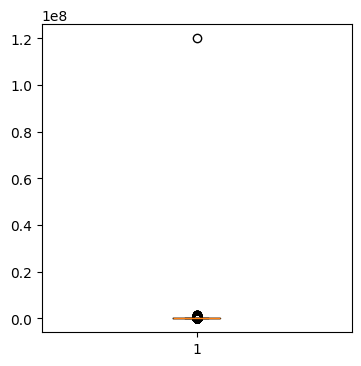

In [24]:
plt.figure(figsize=(4,4))
plt.boxplot(df['max_salary'])
plt.show()

In [25]:
print(df['max_salary'].max())
print(df[df['max_salary']==120000000]['currency'])

120000000
1663682    USD
Name: currency, dtype: object


In [26]:
df= df[df['max_salary']!=120000000]

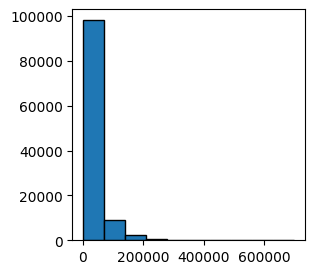

In [27]:
plt.figure(figsize=(3,3))
plt.hist(df['min_salary'], edgecolor='black')
plt.show()

In [28]:
df['company_size'].unique()

array([2, 1, 7, 5, 4, 6, 3])

In [29]:
df.describe(exclude='number')

,company_name,title,pay_period,location,formatted_work_type,original_listed_time,application_type,formatted_experience_level,listed_time,work_type,currency,compensation_type,skill_name,benifit,state,country,city,industry,speciality
count,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615,109615
unique,21066,64819,6,8065,7,NaN,4,7,NaN,7,5,2,35,13,616,73,3673,143,9867
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,unknown,United States,Full-time,NaN,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,unknown,unknown,Health Care Provider,unknown,California,US,New York,Staffing and Recruiting,unknown
freq,1108,661,77722,6666,87577,NaN,76650,37380,NaN,87577,77722,77722,15506,83966,6702,105174,6956,17174,22128
mean,NaN,NaN,NaN,NaN,NaN,2024-04-14 15:50:36.690234368,NaN,NaN,2024-04-15 03:16:04.083382784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2023-12-05 00:00:00,NaN,NaN,2024-03-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2024-04-11 00:00:00,NaN,NaN,2024-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2024-04-17 00:00:00,NaN,NaN,2024-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2024-04-18 00:00:00,NaN,NaN,2024-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2024-04-20 00:00:00,NaN,NaN,2024-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

#### Job opportunities across each country

In [30]:
job_per_country = df.groupby('country')['job_id'].count().reset_index()
job_per_country_sorted = job_per_country.sort_values(by='job_id', ascending=False).reset_index(drop=True)
job_per_country_sorted.columns= ['country', 'jobs']
# job_per_country_sorted

In [31]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my_geocoder')

def get_geocode(country):
    try:
        location=geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None,None

In [32]:
job_per_country_sorted['latitude'], job_per_country_sorted['longitude'] = zip(*job_per_country_sorted['country'].apply(get_geocode))
# job_per_country_sorted.head()

In [33]:
import folium
world_map= folium.Map(location=[20,2], zoom_start=3)

for i, row in job_per_country_sorted.iterrows():
    if row['jobs']>500:
        marker_color = 'orange'
    elif row['jobs']>100:
        marker_color= 'pink'
    else:
        marker_color='blue'
    
    label = f"{row['jobs']} jobs"
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon= folium.Icon(color=marker_color),
        popup = label,
        tooltip=row['country'],
    )
    marker.add_to(world_map)

world_map

#### Total jobs offered by each company

In [34]:
job_per_company = df.groupby('company_name')['job_id'].count().reset_index()
job_per_company.columns = ['company','jobs']
job_per_company_sorted = job_per_company.sort_values(by='jobs', ascending=False)

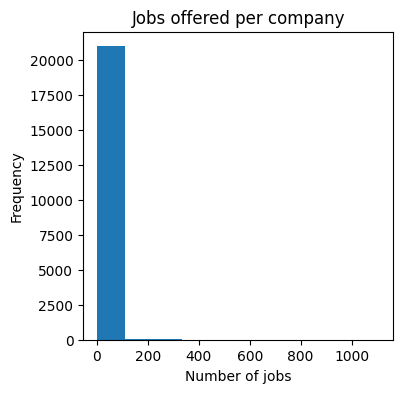

In [35]:
plt.figure(figsize=(4,4))
plt.hist(job_per_company['jobs'], bins=10)
plt.title("Jobs offered per company")
plt.xlabel("Number of jobs")
plt.ylabel('Frequency')
plt.show()

A lot of companies offered 1-150 jobs. Very Few companies offered more than 200 jobs. Viewing this distribution in more detail.

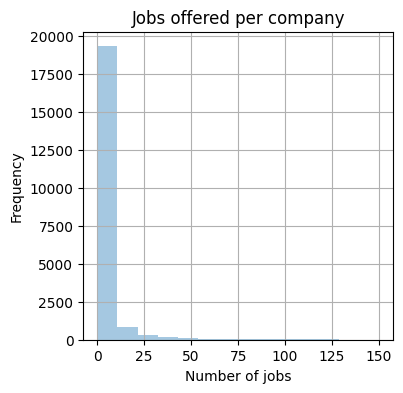

In [36]:
plt.figure(figsize=(4,4))
bins = np.linspace(0, 150, 15)
sns.distplot(job_per_company['jobs'], bins=bins, kde=False)

plt.title("Jobs offered per company")
plt.xlabel("Number of jobs")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Top 5 hiring companies

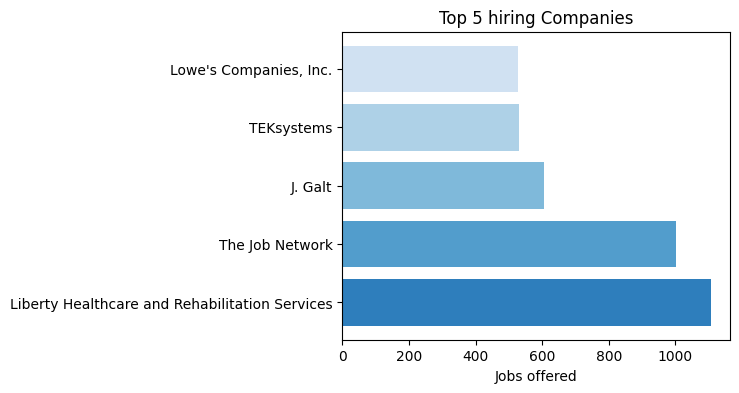

In [37]:
plt.figure(figsize=(5,4))
x = job_per_company_sorted['company'][0:5]
y = job_per_company_sorted['jobs'][0:5]
colors = plt.cm.Blues(np.linspace(0.7,0.2, len(x)))
# colors = plt.cm.Blues(np.linspace(1, 0, len(x)))
plt.barh(x,y, color=colors)
plt.title("Top 5 hiring Companies")
plt.xlabel('Jobs offered')
plt.show()

#### Jobs distrubution per month

In [38]:
year_posted = df['original_listed_time'].dt.year
year_posted.value_counts()

original_listed_time
2024    109614
2023         1
Name: count, dtype: int64

In [39]:
# there is only one date from year 2023
index_2023 = df[df['original_listed_time'].dt.year==2023].index
df.drop(index = index_2023, inplace=True)

In [40]:
month_posted = df['original_listed_time'].dt.month
job_per_month = month_posted.value_counts()

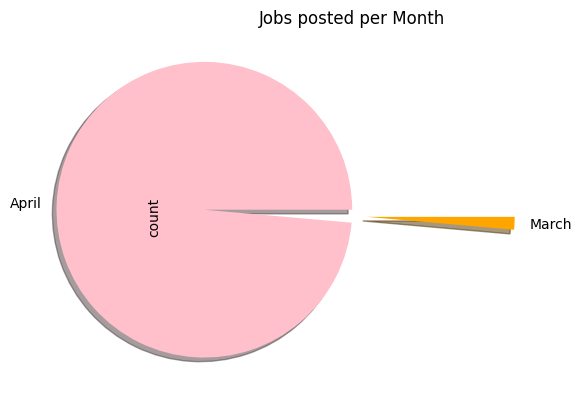

In [41]:
job_per_month[0:2].plot.pie(labels=['April','March'], explode=[1,0.1], shadow=True, colors=['pink','orange'])
plt.title("Jobs posted per Month")
plt.show()

#### Salary trend in industries

In [42]:
salary_per_industry = df.groupby('industry')[['min_salary','max_salary','med_salary']].sum().reset_index()
minsalary_per_industry_sorted = salary_per_industry.sort_values(by='min_salary', ascending =False)
maxsalary_per_industry_sorted = salary_per_industry.sort_values(by='max_salary', ascending =False)
# medsalary_per_industry_sorted = salary_per_industry.sort_values(by='med_salary', ascending =False)

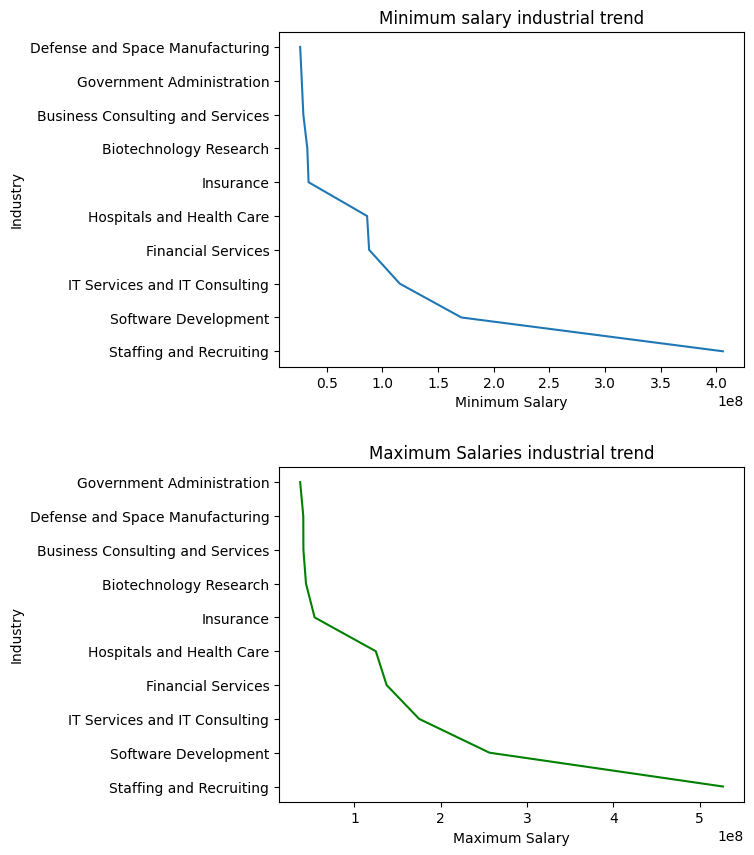

In [43]:
y1= minsalary_per_industry_sorted['industry'][0:10]
y2= maxsalary_per_industry_sorted['industry'][0:10]
# y3= medsalary_per_industry_sorted['industry'][0:10]
x1 = minsalary_per_industry_sorted['min_salary'][0:10]
x2 = maxsalary_per_industry_sorted['max_salary'][0:10]
# x3 = medsalary_per_industry_sorted['med_salary'][0:10]

plt.figure(figsize=(6, 10))
plt.subplot(2,1,1)
plt.plot(x1, y1)
plt.title("Minimum salary industrial trend")
plt.xlabel("Minimum Salary")
plt.ylabel("Industry")

plt.subplot(2, 1, 2)
plt.plot(x2, y2, color='green')
plt.title("Maximum Salaries industrial trend")
plt.xlabel("Maximum Salary")
plt.ylabel("Industry")

# plt.subplot(3, 1, 3)
# plt.plot(x3, y3, color='green')
# plt.title("Median Salaries industrial trend")
# plt.xlabel("Median Salary")
# plt.ylabel("Industry")

plt.subplots_adjust(hspace=0.3)
plt.show()

#### Job demand per job type

In [44]:
job_title = df.groupby('title')['job_id'].count().reset_index()
job_title_sorted = job_title.sort_values(by='job_id', ascending =False)

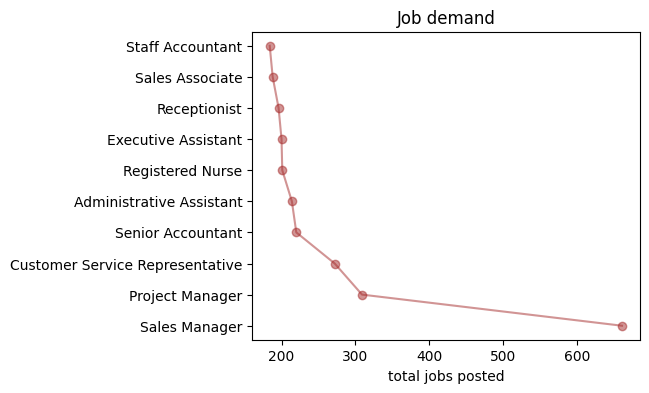

In [45]:
plt.figure(figsize=(5,4))
x = job_title_sorted['title'][0:10]
y = job_title_sorted['job_id'][0:10]
plt.plot(y,x, marker='o', alpha=0.5, color='brown')
plt.title("Job demand")
plt.xlabel('total jobs posted')
plt.show()

#### Is Remote work allowed?

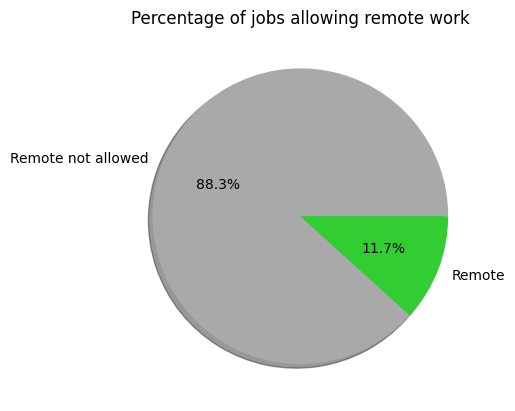

In [46]:
remote_work= df['remote_allowed'].value_counts()
plt.pie(remote_work, labels=['Remote not allowed', 'Remote'], autopct='%0.1f%%', colors=['darkgray','limegreen'], shadow=True)
plt.title("Percentage of jobs allowing remote work")
plt.show()

#### Which job type is comfortable with remote work?

In [47]:
remote_job_type = df[df['remote_allowed']==1].groupby('formatted_work_type')['remote_allowed'].count().reset_index()
remote_job_type.columns=['work_type', 'remote']
# remote_job_type

In [48]:
job_count_by_remote = df.groupby(['formatted_work_type','remote_allowed']).size().reset_index(name='job_count')
# job_count_by_remote
remote_job_table = job_count_by_remote.pivot(index='formatted_work_type', columns='remote_allowed')
# remote_job_table

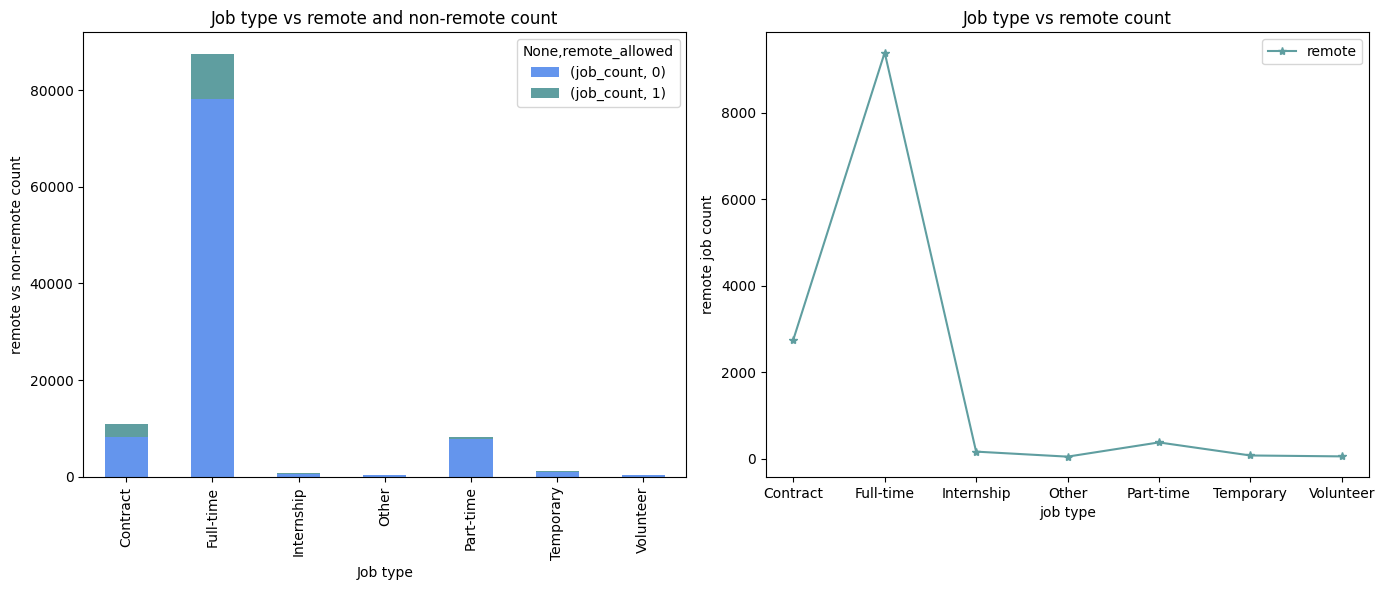

In [49]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
# plt.subplot(1,2,1)
remote_job_table.plot(kind='bar', stacked=True, color=['cornflowerblue', 'cadetblue'], ax=axes[0])
axes[0].set_xlabel('Job type')
axes[0].set_ylabel('remote vs non-remote count')
axes[0].set_title('Job type vs remote and non-remote count')

# plt.subplot(1,2,2)
remote_job_type.plot(x='work_type', y='remote', color='cadetblue', marker='*' , ax= axes[1])
axes[1].set_xlabel('job type')
axes[1].set_ylabel('remote job count')
axes[1].set_title('Job type vs remote count')
plt.tight_layout()
plt.show()

#### Remote job location trend

In [50]:
remote_per_city = df[df['remote_allowed']==1].groupby('city')['remote_allowed'].count().reset_index()
# remote_per_city
remote_per_city_sorted = remote_per_city.sort_values(by='remote_allowed', ascending=False)

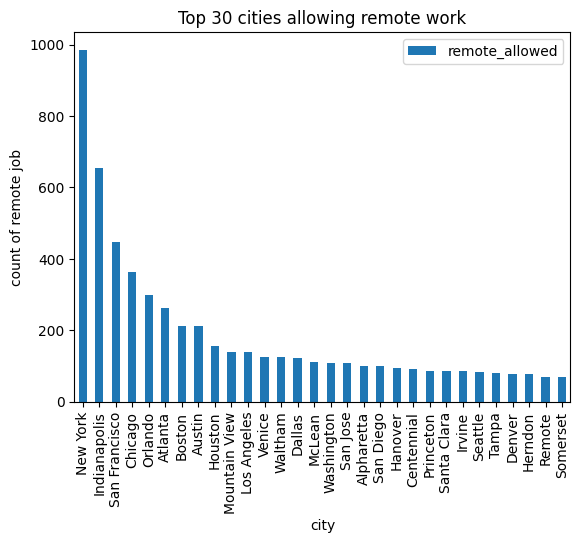

In [51]:
# plt.figure(figsize=(100,20))
remote_per_city_sorted[0:30].plot(kind='bar',x= 'city',y='remote_allowed' )
plt.xlabel("city")
plt.ylabel("count of remote job")
plt.title("Top 30 cities allowing remote work")
plt.show()

#### What are some popular industries?

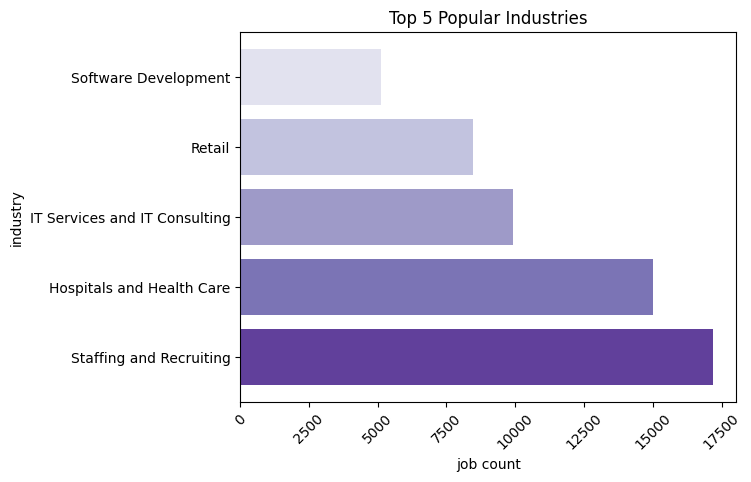

In [52]:
popular_industry = df.groupby('industry').size().reset_index(name='frequency').sort_values(by='frequency', ascending=False).reset_index(drop=True)
x = popular_industry['industry'][0:5]
y = popular_industry['frequency'][0:5]
colormap= plt.cm.Purples(np.linspace(0.8,0.2,len(x)))
plt.barh(x,y, color=colormap)
plt.xlabel('job count')
plt.ylabel('industry')
plt.title('Top 5 Popular Industries')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

#### Skills required in popular industries

In [53]:
skill_demand = df.groupby(['industry','skill_name']).size().reset_index(name='skill_count')

In [54]:
# skills in industry 1
skill1 = skill_demand[skill_demand['industry']=='Staffing and Recruiting'].sort_values(by='skill_count', ascending=False).head(10).pivot(columns='industry',index='skill_name')

#industry 2
skill2 = skill_demand[skill_demand['industry']=='Hospitals and Health Care'].sort_values(by='skill_count', ascending=False).head(10).pivot(columns='industry',index='skill_name')

#industry 3
skill3 = skill_demand[skill_demand['industry']=='IT Services and IT Consulting'].sort_values(by='skill_count', ascending=False).head(10).pivot(columns='industry',index='skill_name')

#industry 4
skill4 = skill_demand[skill_demand['industry']=='Retail'].sort_values(by='skill_count', ascending=False).head(10).pivot(columns='industry',index='skill_name')


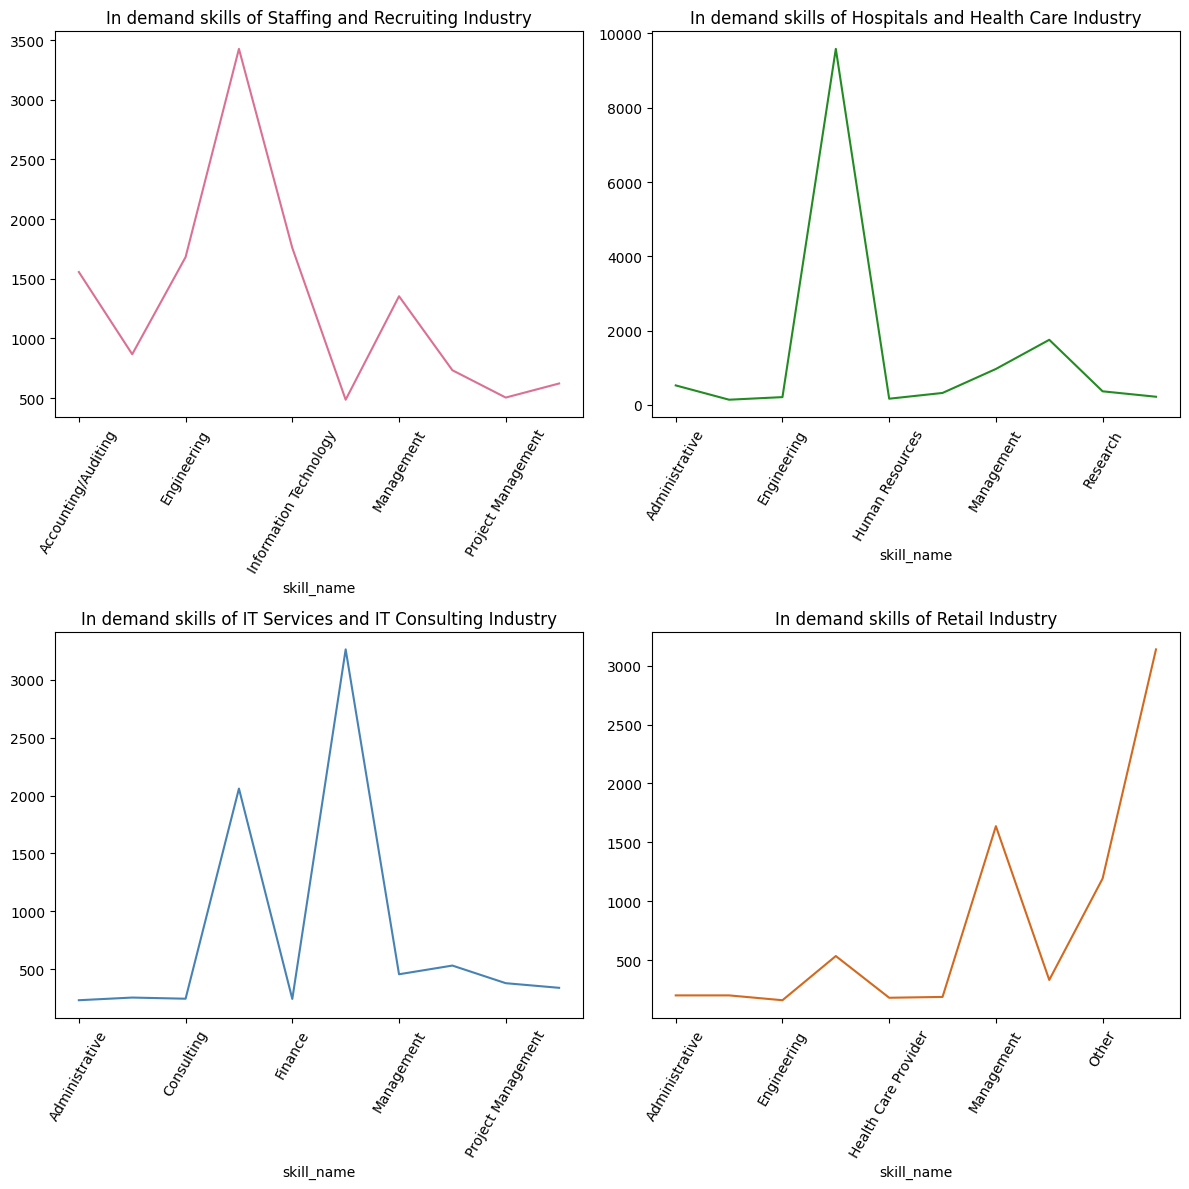

In [55]:
fig, axes =plt.subplots(2,2, figsize=(12,12))

skill1.plot(color='palevioletred', ax= axes[0,0], legend=False)
axes[0, 0].set_title("In demand skills of Staffing and Recruiting Industry")

skill2.plot(color='forestgreen', ax= axes[0,1],legend=False)
axes[0, 1].set_title("In demand skills of Hospitals and Health Care Industry")

skill3.plot(color='steelblue', ax= axes[1,0],legend=False)
axes[1, 0].set_title("In demand skills of IT Services and IT Consulting Industry")

skill4.plot(color='chocolate', ax= axes[1,1],legend=False)
axes[1, 1].set_title("In demand skills of Retail Industry")

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)
    

plt.tight_layout()
plt.show()

#### Companies recieving highest applications

In [56]:
company_choice = df.groupby('company_name')[['views', 'applies']].count().sort_values(by='views',ascending=False).reset_index()
company_choice

,company_name,views,applies
0,Liberty Healthcare and Rehabilitation Services,1108,1108
1,The Job Network,1003,1003
2,J. Galt,604,604
3,TEKsystems,529,529
4,"Lowe's Companies, Inc.",527,527
...,...,...,...
21061,180 the Store,1,1
21062,zTrip,1,1
21063,xtype.io,1,1
21064,will bank,1,1


Almost all views are getting converted into applications

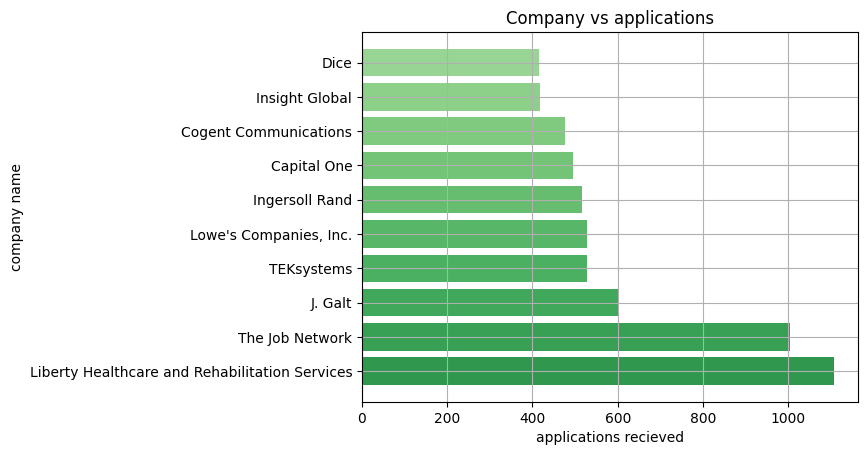

In [57]:
x=company_choice['company_name'][0:10]
y= company_choice['applies'][0:10]
colors = plt.cm.Greens(np.linspace(0.7,0.4,len(x)))
plt.barh(x,y, color=colors)
plt.title("Company vs applications")
plt.ylabel("company name")
plt.xlabel("applications recieved")
plt.grid(True)
plt.show()

#### Application trend over regions

In [58]:
df.columns

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'med_salary', 'min_salary',
       'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'application_type', 'expiry',
       'formatted_experience_level', 'listed_time', 'sponsored', 'work_type',
       'currency', 'compensation_type', 'skill_name', 'benifit',
       'company_size', 'state', 'country', 'city', 'zip_code', 'industry',
       'speciality'],
      dtype='object')

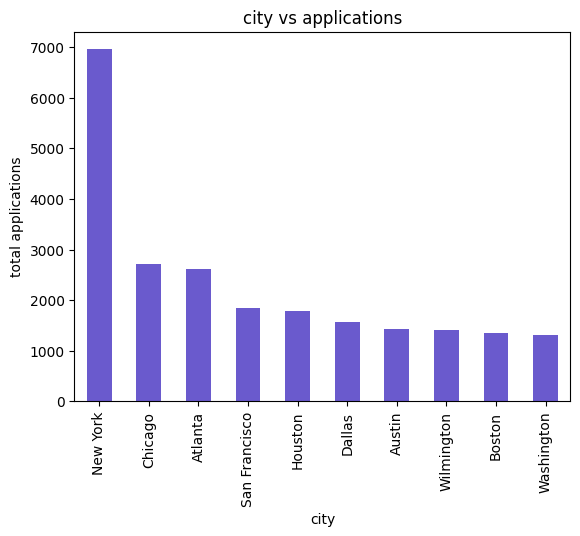

In [59]:
city_choice=df.groupby('city')['applies'].count().reset_index().sort_values(by='applies', ascending=False).reset_index(drop=True)
city_choice[0:10].plot(x='city',y='applies',kind='bar',legend=False, color='slateblue')
plt.title("city vs applications")
plt.ylabel("total applications")
plt.show()

#### Benifits provided by companies

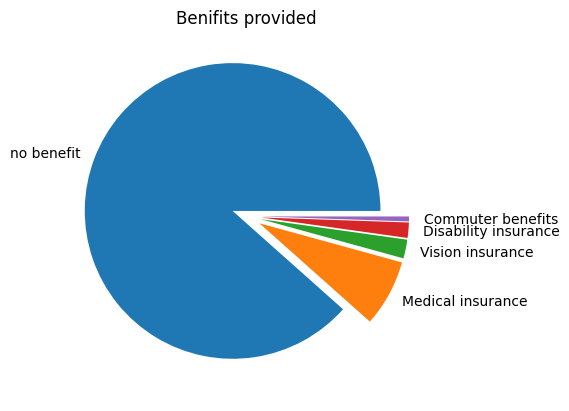

In [60]:
benifit_df = df[df['benifit']!='401(k)']
ben = benifit_df['benifit'].value_counts()
b=['no benefit','Medical insurance','Vision insurance','Disability insurance','Commuter benefits']
plt.pie(ben[0:5], labels=b, explode=[0.1,0.1,0.1,0.1,0.1])
plt.title("Benifits provided")
plt.show()